In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [2]:
train_df = pd.read_csv("Data_Train.csv")
train_df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [3]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
train_df.isnull().head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [7]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_df.dropna(inplace = True)

In [9]:
train_df[train_df.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [10]:
train_df.drop_duplicates(keep='first',inplace=True)
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
train_df.shape

(10462, 11)

In [12]:
train_df["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [13]:
train_df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [14]:
train_df["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [15]:
test_df = pd.read_csv("Test_set.csv")
test_df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


In [16]:
test_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [18]:
test_df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [19]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

# Data Visualization
 Plotting Price vs Airline plot

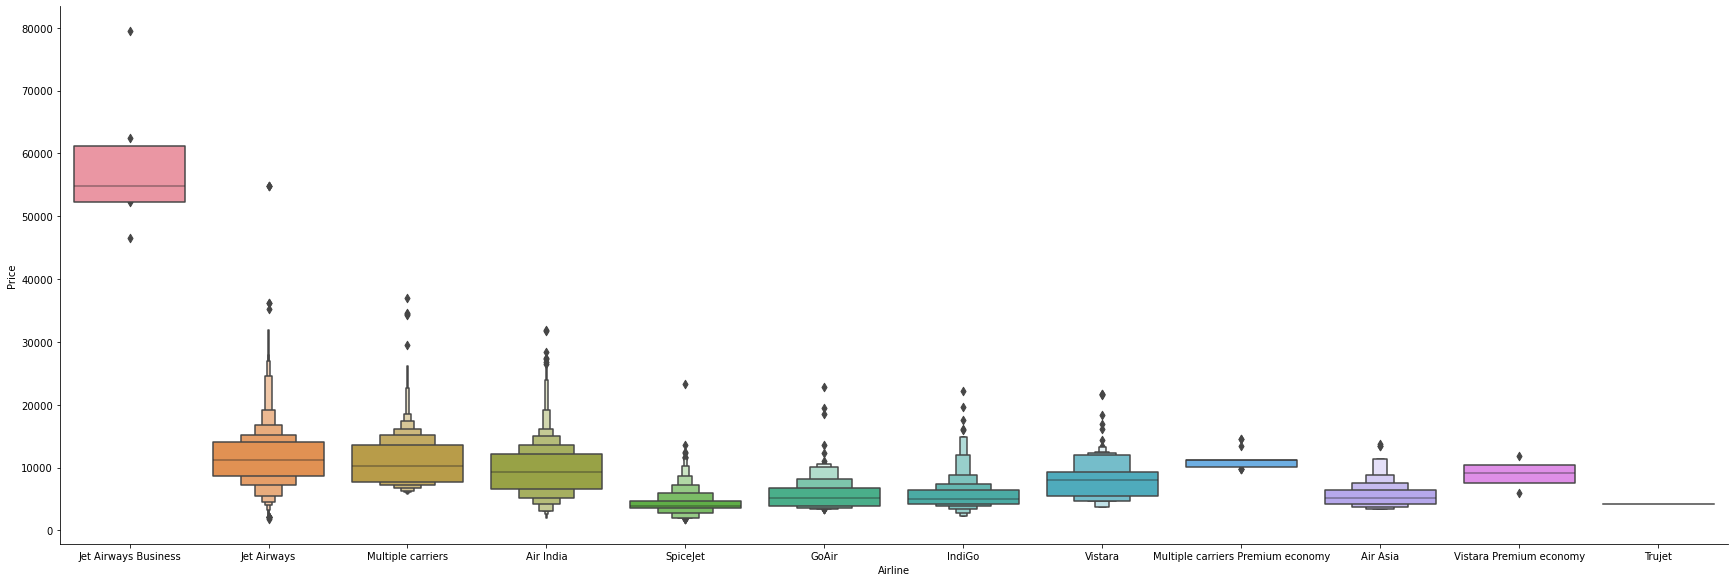

In [20]:
sns.catplot(y = "Price", x = "Airline", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

Here with the help of the cat plot we are trying to plot the boxplot between the price of the flight and airline and we can conclude that Jet Airways has the most outliers in terms of price.

Plotting Violin plot for Price vs Source

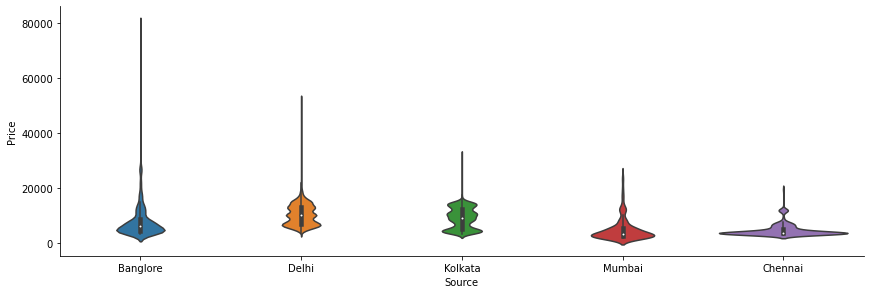

In [21]:
sns.catplot(y = "Price", x = "Source", data = train_df.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

Now with the help of cat plot only we are plotting a box plot between the price of the flight and the source place i.e. the place from where passengers will travel to the destination and we can see that Banglore as the source location has the most outliers while Chennai has the least.

Plotting Box plot for Price vs Destination

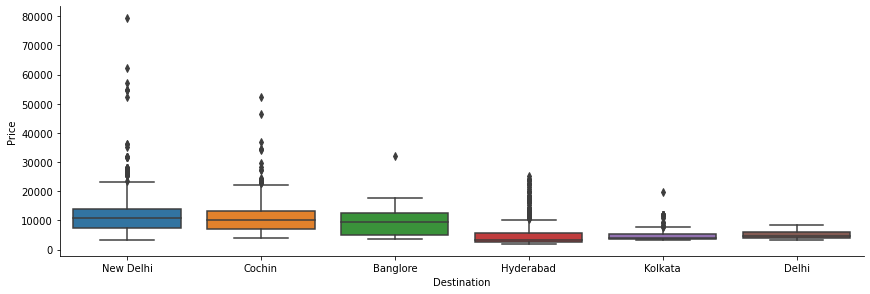

In [22]:
sns.catplot(y = "Price", x = "Destination", data = train_df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

Here we are plotting the box plot with the help of a cat plot between the price of the flight and the destination to which the passenger is travelling and figured out that New Delhi has the most outliers and Kolkata has the least.

# Feature Engineering
Let’s see our processed data first

In [23]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Here first we are dividing the features and labels and then converting the hours in minutes.

In [24]:
train_df['Duration'] = train_df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_df['Duration'] = test_df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

Date_of_Journey: Here we are organizing the format of the date of journey in our dataset for better preprocessing in the model stage.

In [25]:
train_df["Journey_day"] = train_df['Date_of_Journey'].str.split('/').str[0].astype(int)
train_df["Journey_month"] = train_df['Date_of_Journey'].str.split('/').str[1].astype(int)
train_df.drop(["Date_of_Journey"], axis = 1, inplace = True)

Dep_Time: Here we are converting departure time into hours and minutes

In [26]:
train_df["Dep_hour"] = pd.to_datetime(train_df["Dep_Time"]).dt.hour
train_df["Dep_min"] = pd.to_datetime(train_df["Dep_Time"]).dt.minute
train_df.drop(["Dep_Time"], axis = 1, inplace = True)

Arrival_Time: Similarly we are converting the arrival time into hours and minutes.

In [27]:
train_df["Arrival_hour"] = pd.to_datetime(train_df.Arrival_Time).dt.hour
train_df["Arrival_min"] = pd.to_datetime(train_df.Arrival_Time).dt.minute
train_df.drop(["Arrival_Time"], axis = 1, inplace = True)

Now after final preprocessing let’s see our dataset

In [28]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


Plotting Bar chart for Months (Duration) vs Number of Flights

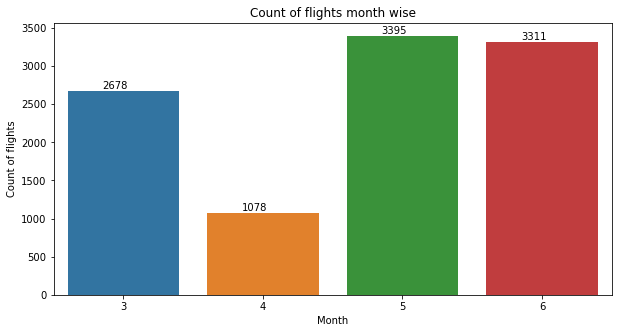

In [29]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = train_df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

Here in the above graph we have plotted the count plot for journey in a month vs several flights and got to see that May has the most number of flights.

Plotting Bar chart for Types of Airline vs Number of Flights

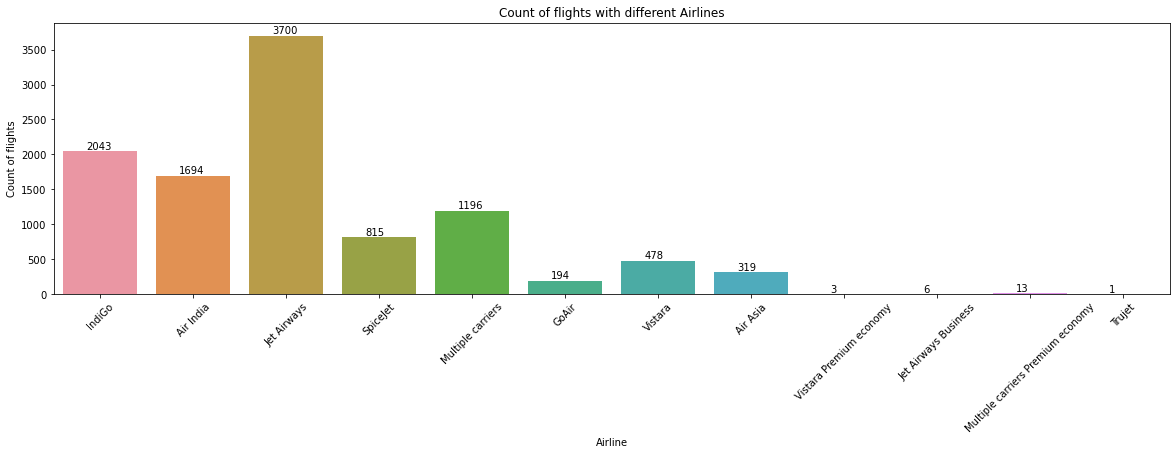

In [30]:
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =train_df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

Now from the above graph we can see that between the type of airline and count of flights we can see that Jet Airways has the most flight boarded.

Plotting Ticket Prices VS Airlines

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

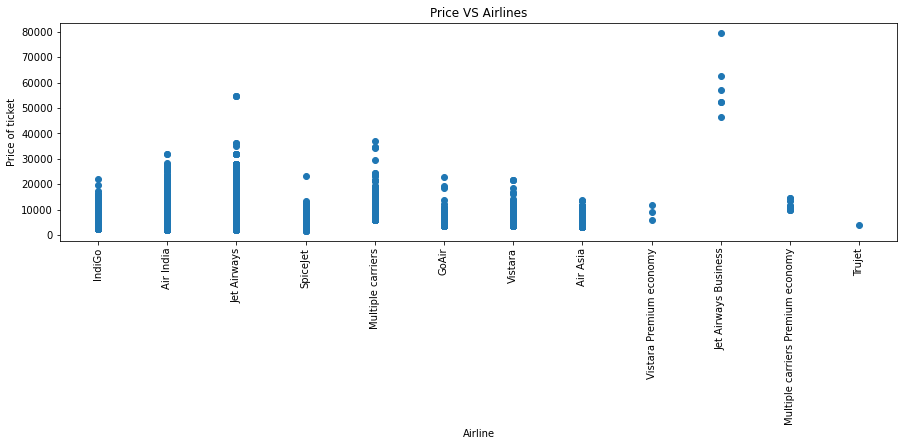

In [31]:
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(train_df['Airline'], train_df['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

# Correlation between all Features

Plotting Correlation

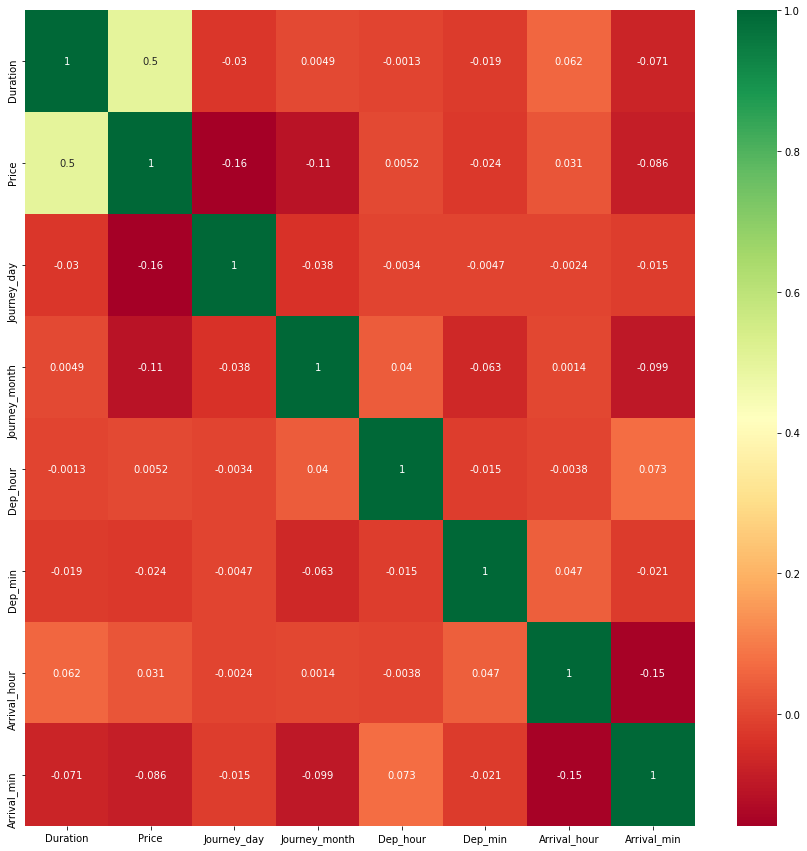

In [32]:
plt.figure(figsize = (15,15))
sns.heatmap(train_df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [33]:
train_data = train_df.select_dtypes(exclude=['int64', 'float','int32'])
train_data = train_df.select_dtypes(include=['int64', 'float','int32'])

test_data = test_df.select_dtypes(exclude=['int64', 'float','int32','int32'])
test_data  = test_df.select_dtypes(include=['int64', 'float','int32'])
train_data.head()

,Duration,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,170,3897,24,3,22,20,1,10
1,445,7662,1,5,5,50,13,15
2,1140,13882,9,6,9,25,4,25
3,325,6218,12,5,18,5,23,30
4,285,13302,1,3,16,50,21,35


Label Encode and Hot Encode for Categorical Columns

In [34]:
le = LabelEncoder()
train_data = train_data.apply(LabelEncoder().fit_transform)
test_data = test_data.apply(LabelEncoder().fit_transform)
train_data.head()

,Duration,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,13,65,8,0,22,4,1,2
1,65,669,0,2,5,10,13,3
2,202,1537,3,3,9,5,4,5
3,41,389,4,2,18,1,23,6
4,33,1457,0,0,16,10,21,7


Concatenating both Categorical Data and Numerical Data

In [35]:
train_data.skew()

Duration         0.825679
Price            0.142810
Journey_day      0.073668
Journey_month   -0.377535
Dep_hour         0.108306
Dep_min          0.171301
Arrival_hour    -0.378978
Arrival_min      0.110802
dtype: float64

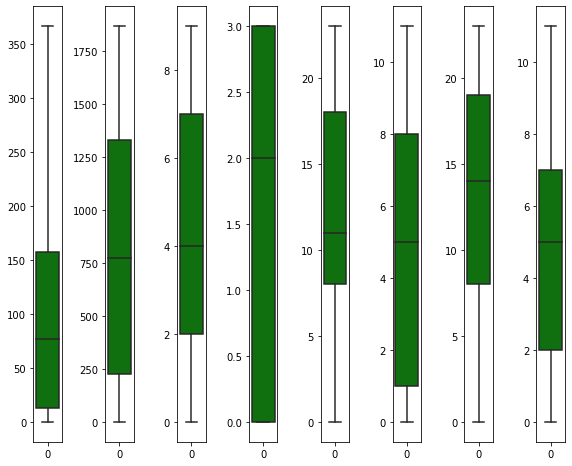

In [36]:
import seaborn as sns
collist=train_data.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= train_data[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [37]:
x = train_data.drop(columns = ['Price'],axis=1)
y= train_data['Price']

In [38]:
x_train = train_data.drop(columns = ['Price'],axis=1)
y_train= train_data['Price']

In [39]:
x_test = test_data.iloc[:,:]

In [40]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

# Training and Testing the Model

In [41]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 100,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")
    

At random state 0,the training accuracy is:- 0.37606532376113044
At random state 0,the testing accuracy is:- 0.5029144762444996


At random state 1,the training accuracy is:- 0.37679684893219756
At random state 1,the testing accuracy is:- 0.4302001079290745


At random state 2,the training accuracy is:- 0.3780353652762719
At random state 2,the testing accuracy is:- 0.3200605188724551


At random state 3,the training accuracy is:- 0.37774025209669393
At random state 3,the testing accuracy is:- 0.35526438770164126


At random state 4,the training accuracy is:- 0.37808765096758645
At random state 4,the testing accuracy is:- 0.3104411428827629


At random state 5,the training accuracy is:- 0.37784411311987476
At random state 5,the testing accuracy is:- 0.3359745776080777


At random state 6,the training accuracy is:- 0.3773642445322586
At random state 6,the testing accuracy is:- 0.39137904204901597


At random state 7,the training accuracy is:- 0.37695196416004273
At random state 7,the tes

In [42]:
maxAcc=0
MaxRs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.100,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    acc=r2_score(y_test,pred_test)
    if acc>maxAcc:
        maxAcc=acc
        MaxRs=i
print("Best Accuracy is",maxAcc,"on random state", MaxRs)

Best Accuracy is 0.42244483420759393 on random state 97


In [43]:
def models(x_train, y_train):
    from sklearn.linear_model import LogisticRegression

    log = LogisticRegression(random_state = 97)
    log.fit(x_train, y_train)

    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p =2)
    knn.fit(x_train, y_train)

    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(x_train, y_train)

    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(x_train, y_train)

    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(x_train, y_train)

    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state =0)
    tree.fit(x_train,y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(x_train,y_train)

    print('[0]Logistic Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(x_train, y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(x_train, y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(x_train, y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(x_train, y_train))
    print('[5]Decision Tree Classsifier Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(x_train, y_train))

    return log, knn, svc_lin, svc_rbf, gauss, tree, forest


In [49]:
model = models(x_train,y_train)

C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0]Logistic Regression Training Accuracy: 0.13913967073818376
[1]K Nearest Neighbor Training Accuracy: 0.4597981943706851
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.28390865639936275
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.2429102496016994
[4]Gaussian Naive Bayes Training Accuracy: 0.28709506107275623
[5]Decision Tree Classsifier Training Accuracy: 0.8557620817843866
[6]Random Forest Classifier Training Accuracy: 0.8408921933085501


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=25)

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()
rf_reg.fit(x_train,y_train)

RandomForestRegressor()

In [46]:
y_pred=rf_reg.predict(x_test)

In [47]:
rf_reg.score(x_train,y_train)

0.9396697739654812

In [48]:
rf_reg.score(x_test,y_test)

0.7703493635057826

In [49]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 184.59613113301467
MSE: 73752.23073379076
RMSE: 271.57361936276277


In [50]:
metrics.r2_score(y_test,y_pred)

0.7703493635057826

C:\Users\Prachi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


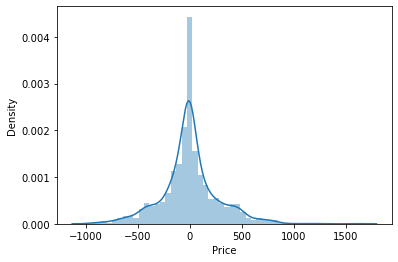

In [51]:
sns.distplot(y_test-y_pred)
plt.show()

# Cross-Validation of the model:

<function matplotlib.pyplot.show(close=None, block=None)>

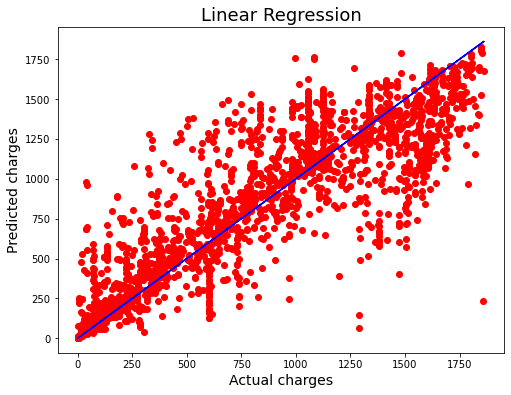

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show

# Regularization

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [54]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [56]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

38.069383337901186

In [57]:
lss=r2_score(y_test,pred_ls)
lss*100

36.4269261197521

In [58]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

37.561653905922334

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [59]:
rf= RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:', rfc*100)

R2 Score: 77.8054381950816
Cross Val Score: 78.41030511935763


# Conclusion

In [60]:
import pickle
filename='Flight_price.pkl'
pickle.dump(rf,open(filename,'wb'))

In [61]:
import pickle
loaded_model=pickle.load(open('Flight_price.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

77.8054381950816


In [62]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","original"])

In [63]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092
Predicted,327.875,1303.54,247.45,62.08,191.09,1485.86,579.05,833.315,1605.07,200.72,...,1380.63,708.675,942.14,1009.94,79.68,5.85,1285.59,949.01,1565.1,284.555
original,327.875,1303.54,247.45,62.08,191.09,1485.86,579.05,833.315,1605.07,200.72,...,1380.63,708.675,942.14,1009.94,79.68,5.85,1285.59,949.01,1565.1,284.555


After training or testing the model with different Classifier the Highest accuracy is given by RandomForest Classifier That is 77%. And we do Cross validation, the Model gives 78% score for cross validation.